### Offsets Blending - Show OffsetsLayer Class Basic Usage

In [1]:
%matplotlib inline
# - Python Dependencies
from __future__ import print_function
import pathlib
import matplotlib.pyplot as plt
from offsets_layer import OffsetsLayer
from utils.set_path import set_path_to_data_dir
from utils.mpl_utils import add_colorbar
# - change matplotlib default setting
plt.rc('font', family='monospace')
plt.rc('font', weight='bold')
plt.style.use('seaborn-deep')

#### Default Test Parameters

In [2]:
# - Test Parameters
# - set path to project data directory
data_path = pathlib.Path(set_path_to_data_dir())
# - import sample Offset Layer
layer_name = 'layer1'

# - Outliers Mask Computation Parameters
metric = 'median_filter'
threshold = 10
window_az = 50
window_rg = 50

#### Load Offset Layer

In [3]:
# - layer 1 - High Resolution
hr_layer = OffsetsLayer(data_path.joinpath(layer_name))

#### Show Offset Layer

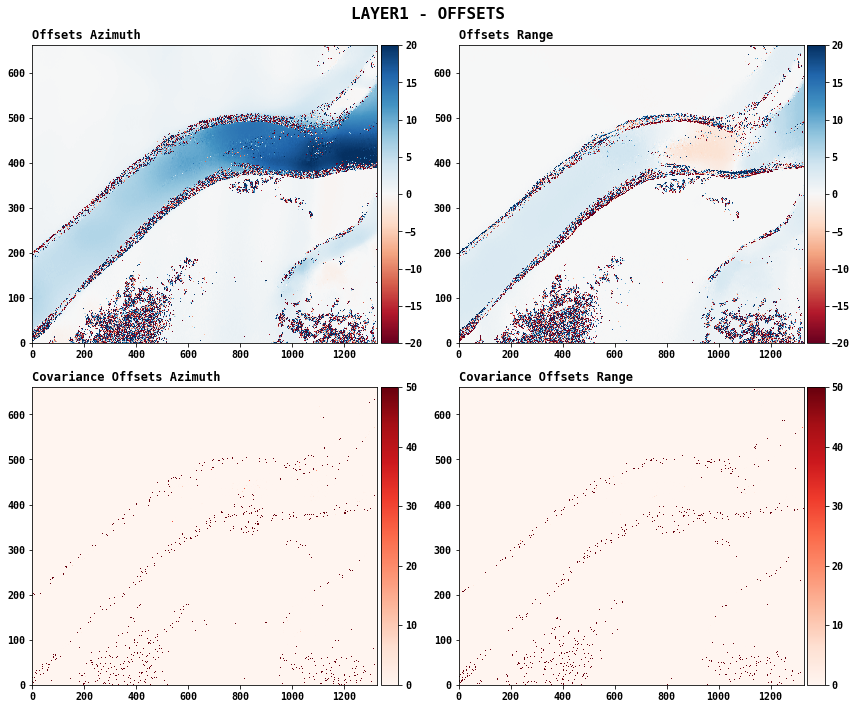

In [4]:
# - Show Offsets
hr_layer.show_offsets(fig_size=(12, 10), title=f'{layer_name} - Offsets'.upper())

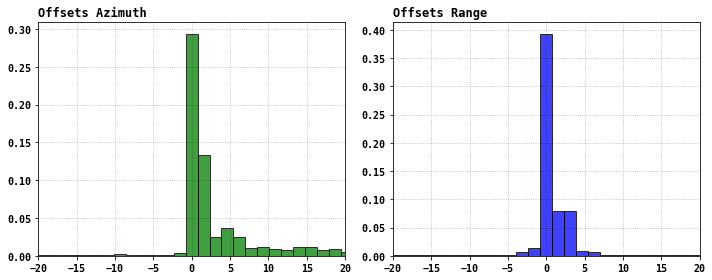

In [5]:
# - Show New Outlier Values Distribution
hr_layer.plot_offsets_distribution()

In [6]:
# - Compute Outliers Mask employing the selected metric and parameters.
outliers_mask = hr_layer.identify_outliers(metric=metric,
                                           threshold=threshold,
                                           window_az=window_az,
                                           window_rg=window_rg)

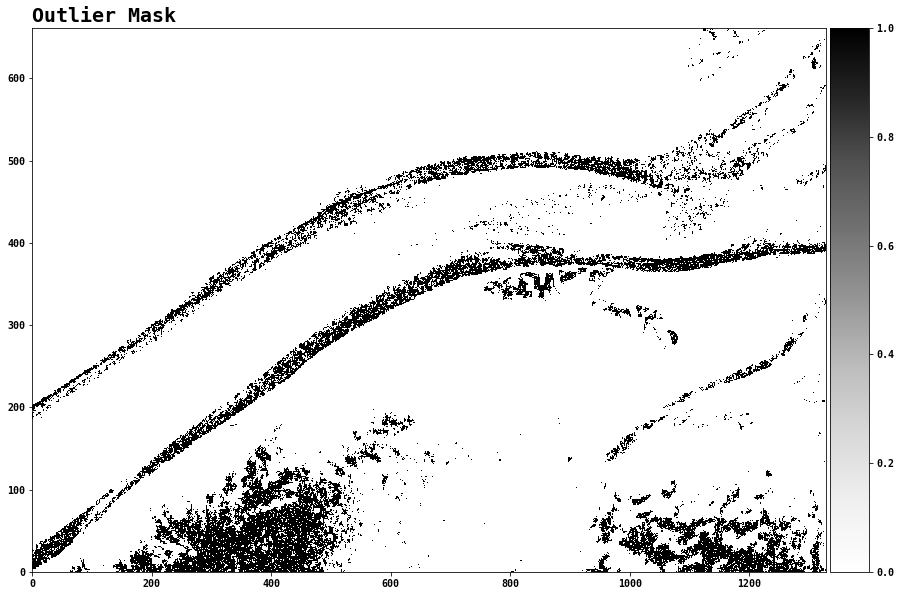

In [7]:
# - Show Outliers Mask
fig_size = (15, 10)
fig = plt.figure(figsize=fig_size)
ax_b = fig.add_subplot(111)
ax_b.set_title('Outlier Mask', weight='bold', loc='left', size=20)
im_b = ax_b.pcolormesh(outliers_mask['binary_mask'].T, cmap=plt.get_cmap('Greys'), vmin=0, vmax=1)
add_colorbar(ax_b, im_b)
plt.show()
plt.close()

### Mask Outliers

# - Set outlier values to NaN.


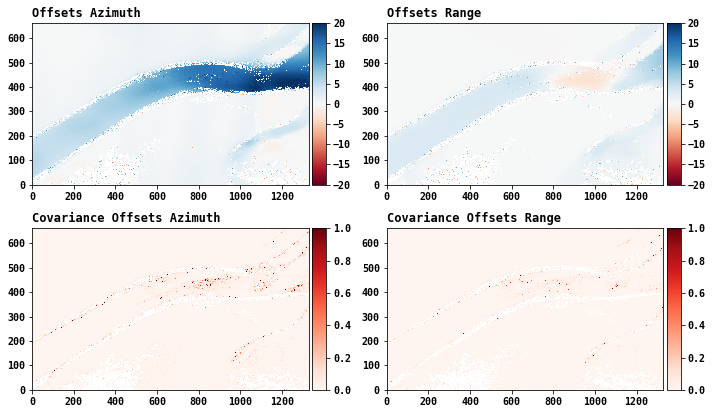

In [8]:
# - Apply Outlier Mask to the selected Layer
hr_layer.mask_outliers(outliers_mask['binary_mask'])

# - Show Offsets after Outlier Removal
print('# - Set outlier values to NaN.')
hr_layer.show_offsets(cov_range=(0, 1), offsets_range=(-20, 20))


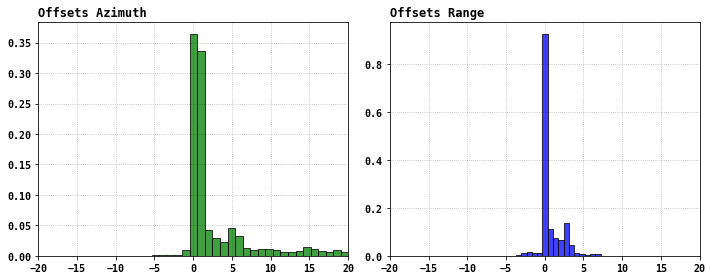

In [9]:
# - Show New Outlier Values Distribution
hr_layer.plot_offsets_distribution()

Show Lower resolution layers

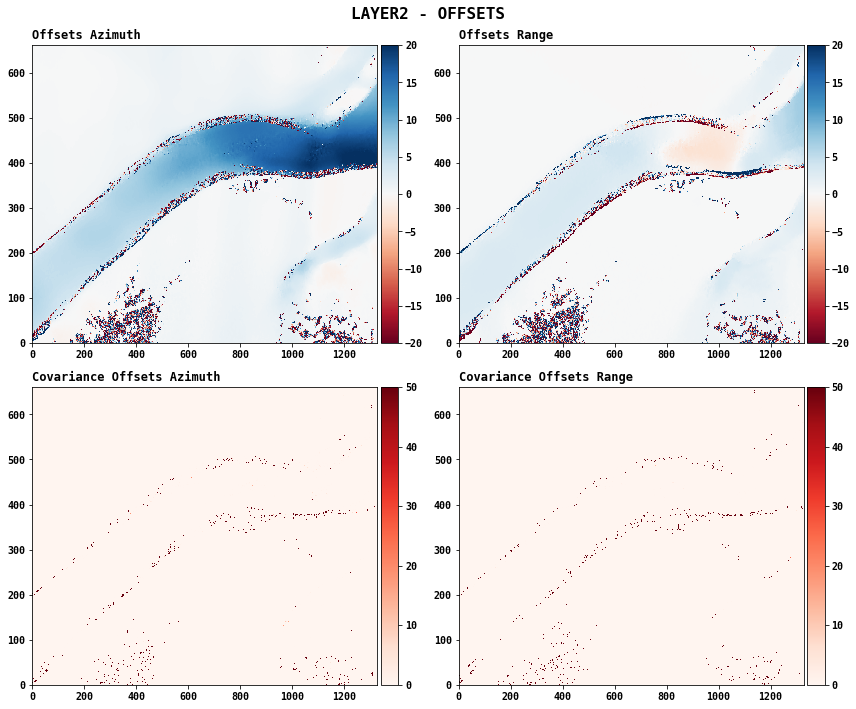

In [10]:
# - Layer 2 - Intermediate Resolution
layer_name = 'layer2'
ir_layer = OffsetsLayer(data_path.joinpath(layer_name))
ir_layer.show_offsets(fig_size=(12, 10), title=f'{layer_name} - Offsets'.upper())

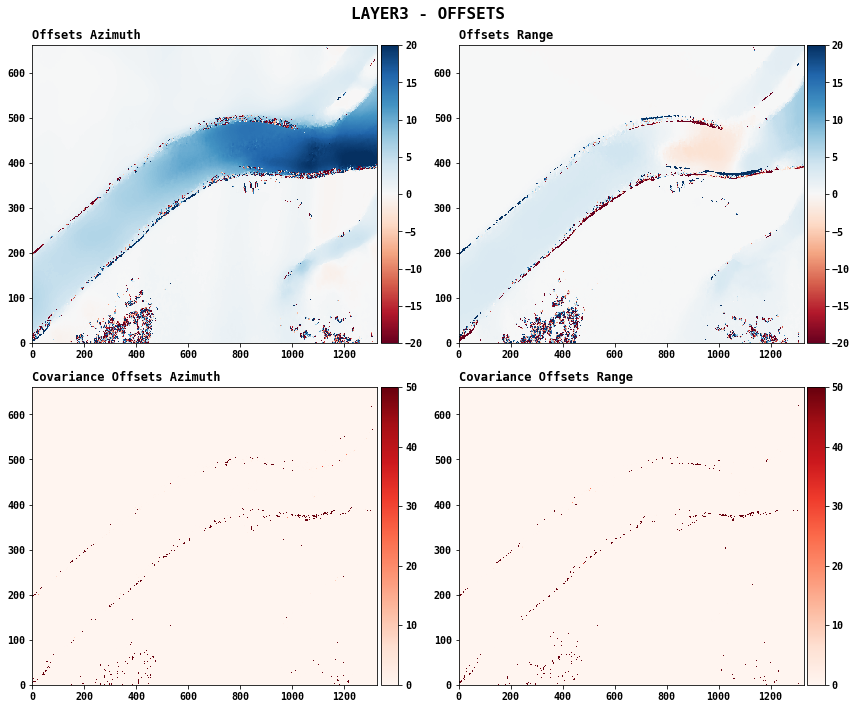

In [11]:
# - Layer 3 - Low Resolution
layer_name = 'layer3'
lr_layer = OffsetsLayer(data_path.joinpath(layer_name))
lr_layer.show_offsets(fig_size=(12, 10), title=f'{layer_name} - Offsets'.upper())